In [3]:
import seaborn as sns
print(sns.get_dataset_names())





['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [1]:
import os

cpu_count = os.cpu_count()
print(f"Number of logical CPUs: {cpu_count}")

Number of logical CPUs: 16


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import sklearn

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 1, 0, 1, 0, 1])

# Initialize KFold with 3 splits, shuffling the data
kf = KFold(n_splits=5, shuffle=True)

final_y = np.empty(len(y)+1)

# Iterate through the splits generated by kf.split()
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}:")
    print(f"  TRAIN indices: {train_index}")
    print(f"  TEST indices: {test_index}")

    # Access the data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"  X_train:\n{X_train}")
    print(f"  y_train: {y_train}")
    print(f"  X_test:\n{X_test}")
    print(f"  y_test: {y_test}\n")

    # In a real scenario, you would train and evaluate your model here
    # For example:
    # model.fit(X_train, y_train)
    # score = model.score(X_test, y_test)
    # print(f"  Model score for this fold: {score}")
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train , y_train)
    curr_y_preds = model.predict(X_test)
    final_y[test_index] = curr_y_preds
    print("preds: " , curr_y_preds)

print(final_y)

Fold 1:
  TRAIN indices: [1 2 4 5]
  TEST indices: [0 3]
  X_train:
[[ 3  4]
 [ 5  6]
 [ 9 10]
 [11 12]]
  y_train: [1 0 0 1]
  X_test:
[[1 2]
 [7 8]]
  y_test: [0 1]

preds:  [0.5 0.5]
Fold 2:
  TRAIN indices: [0 1 2 3 5]
  TEST indices: [4]
  X_train:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [11 12]]
  y_train: [0 1 0 1 1]
  X_test:
[[ 9 10]]
  y_test: [0]

preds:  [0.89189189]
Fold 3:
  TRAIN indices: [0 1 3 4 5]
  TEST indices: [2]
  X_train:
[[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]
 [11 12]]
  y_train: [0 1 1 0 1]
  X_test:
[[5 6]]
  y_test: [0]

preds:  [0.55813953]
Fold 4:
  TRAIN indices: [0 2 3 4 5]
  TEST indices: [1]
  X_train:
[[ 1  2]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
  y_train: [0 0 1 0 1]
  X_test:
[[3 4]]
  y_test: [1]

preds:  [0.10810811]
Fold 5:
  TRAIN indices: [0 1 2 3 4]
  TEST indices: [5]
  X_train:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
  y_train: [0 1 0 1 0]
  X_test:
[[11 12]]
  y_test: [1]

preds:  [0.4]
[0.5        0.10810811 0.55813953 0.5        0.891891

In [ ]:
# 1. Make a pool of threads.
# 2. 

def k_fold_init_thread_pool(model , kf , X , y):
        print("Staring Validator training!!!")
        def train_indexes(train_index , test_index):
            """
            The thing that we call each time in he k_fold
            """
            model_clone = sklearn.clone(model)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            model_clone.fit(X_train , y_train)
            curr_y_preds = model_clone.predict(X_test)
            final_y[test_index] = curr_y_preds.flatten()

        # the final array
        final_y = np.empty(len(y))
        # k fold thing 
        threads = []
        for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
            curr_thread = threading.Thread(target=train_indexes , kwargs={
                "train_index" : train_index,
                "test_index" : test_index
            })
            threads.append(curr_thread)
            curr_thread.start()
        for thread in threads:
            thread.join()
        return final_y 

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import sklearn
import threading
import seaborn as sns
import time
from sklearn.base import clone

df = sns.load_dataset('diamonds')

def k_fold_general_threads(model , kf , X , y):
        print("Staring Validator training!!!")
        def train_indexes(train_index , test_index):
            """
            The thing that we call each time in he k_fold
            """
            model_clone = sklearn.clone(model)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            model_clone.fit(X_train , y_train)
            curr_y_preds = model_clone.predict(X_test)
            final_y[test_index] = curr_y_preds.flatten()

        # the final array
        final_y = np.empty(len(y))
        # k fold thing 
        threads = []
        for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
            curr_thread = threading.Thread(target=train_indexes , kwargs={
                "train_index" : train_index,
                "test_index" : test_index
            })
            threads.append(curr_thread)
            curr_thread.start()
        for thread in threads:
            thread.join()
        return final_y 

def k_fold_general_no_threads(model , kf , X , y):
    def train_indexes(train_index , test_index):
        """
        The thing that we call each time in he k_fold
        """
        model_clone = clone(model)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model_clone.fit(X_train , y_train)
        curr_y_preds = model_clone.predict(X_test)
        final_y[test_index] = curr_y_preds.flatten()

    # the final array
    final_y = np.empty(len(y))
    # k fold thing 
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        train_indexes(train_index , test_index)
    return final_y

"""
k_fold_general(
    model=sklearn.linear_model.LinearRegression(),
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True),
    X=np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]]),
    y=np.array([0, 1, 0, 1, 0, 1])
)
"""

# speed test

train_height = 60
x_val = []
multi_times = []
single_times = []
model_look_at = sklearn.tree.DecisionTreeRegressor()



for x in range(2 , train_height):
    start_time = time.time()
    k_fold_general_threads(
        model=model_look_at,
        kf = sklearn.model_selection.KFold(n_splits=x, shuffle=True),
        X=df[['x']],
        y=df[['y']]
    )
    end_time = time.time()
    multi_times.append(end_time - start_time)
    #print(f"Training time multi-threading {end_time - start_time}")

    start_time = time.time()
    k_fold_general_no_threads(
        model=model_look_at,
        kf = sklearn.model_selection.KFold(n_splits=x, shuffle=True),
        X=df[['x']],
        y=df[['y']]
    )
    end_time = time.time()
    single_times.append(end_time - start_time)
    x_val.append(x)
    #print(f"Training time single thread {end_time - start_time}")





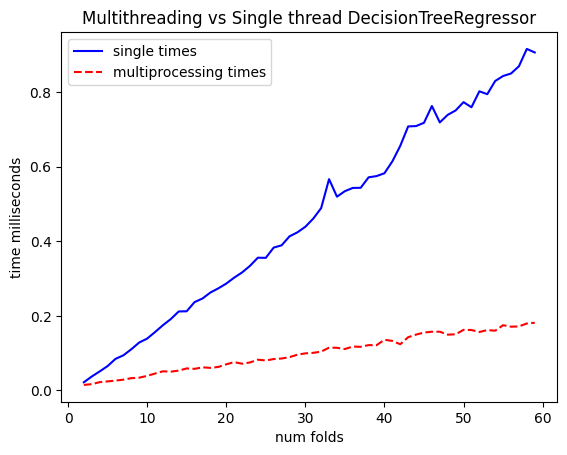

In [6]:
import matplotlib.pyplot as plt
plt.plot(x_val, single_times, label='single times', color='blue', linestyle='-')

# Plot the second line
plt.plot(x_val, multi_times, label='multiprocessing times', color='red', linestyle='--')

# Add labels and title
plt.xlabel('num folds')
plt.ylabel('time milliseconds')
plt.title(f'Multithreading vs Single thread {model_look_at.__class__.__name__}')

# Add a legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()